In [ ]:
# Problem 4: In this section, the Naive-Bayes-Classifier presented for classification of the Heart-Disease datasets
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
 # 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score



In [ ]:
data = pd.read_csv("Heart-disease.csv")

# print the first 5 rows of the dataframe
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Exploring the data type of each column
data.info()
# Checking the data shape
data.shape
data.isnull().sum()
# # Remove rows with null values
data = data.dropna()
# Reset the index after removing rows
data = data.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# training_x=data.iloc[1:data.shape[0],0:13]
# # #print(training_set)

# # training_y=data.iloc[1:data.shape[0],13:14]
# # #print(testing_set)
# # training_y.shape, training_x.shape
# # # converting dataframe into arrays
# X=data.iloc[:,:-1].values
# y=data.iloc[:,-1].values
X = data.drop("target",axis=1)
y = data["target"]
X.shape, y.shape

((1025, 13), (1025,))

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

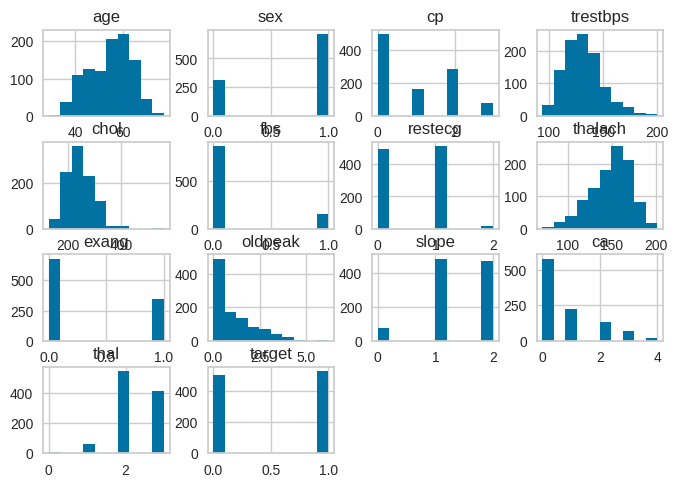

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.15, shuffle=True,random_state=16)
data.hist()

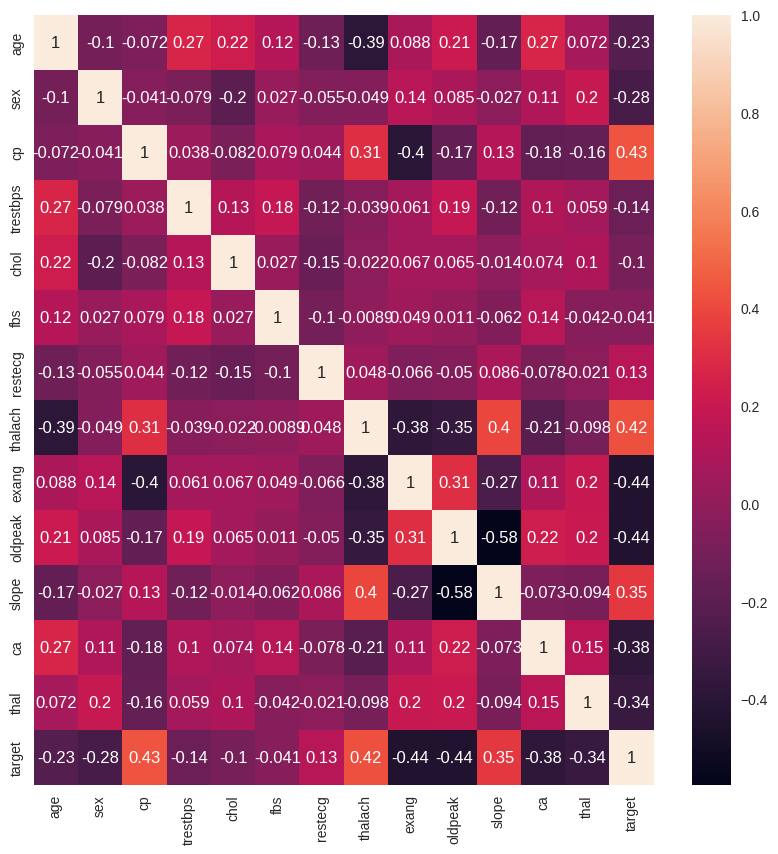

In [ ]:
cor=data.corr()
# fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
ax = sns.heatmap(cor, annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
print(x_train[:5])
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train[:5])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
465   38    1   2       138   175    0        1      173      0      0.0   
914   66    1   0       112   212    0        0      132      1      0.1   
351   50    1   0       144   200    0        0      126      1      0.9   
209   62    1   1       120   281    0        0      103      0      1.4   
356   59    1   0       164   176    1        0       90      0      1.0   

     slope  ca  thal  
465      2   4     2  
914      2   1     2  
351      1   0     3  
209      1   1     3  
356      1   2     1  
[[-1.80612057  0.68107676  1.0257476   0.34782794 -1.35563193 -0.43762823
   0.91251829  1.03324158 -0.70102664 -0.92064724  0.99345642  3.16430654
  -0.54781382]
 [ 1.26661528  0.68107676 -0.92283727 -1.13810141 -0.65599785 -0.43762823
  -0.97090216 -0.76036576  1.4264793  -0.83615839  0.99345642  0.24675785
  -0.54781382]
 [-0.48923378  0.68107676 -0.92283727  0.69073471 -0.8829062  -0.43762823
  -0.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
Model_BN = GaussianNB()

Model_BN.fit(x_train,y_train.ravel())
pred_NB = Model_BN.predict(x_test)

print(classification_report(y_test,pred_NB))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        80
           1       0.78      0.85      0.81        74

    accuracy                           0.81       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.81      0.81      0.81       154



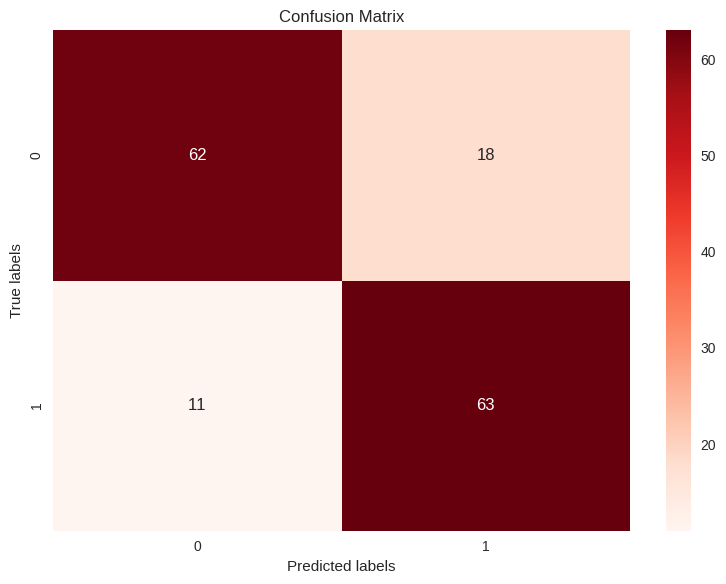

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        80
           1       0.78      0.85      0.81        74

    accuracy                           0.81       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.81      0.81      0.81       154

test_accuracy: 0.8116883116883117


In [ ]:
# Making predictions on the test set problem 3.2
y_pred_BN = Model_BN.predict(x_test )
accuracy_BN = Model_BN.score(x_test ,y_test )
# Loss = model_DT.loss_curve_
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_BN)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Reds', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_BN))
print("test_accuracy:", accuracy_BN)

Text(0, 0.5, 'Type of disease')

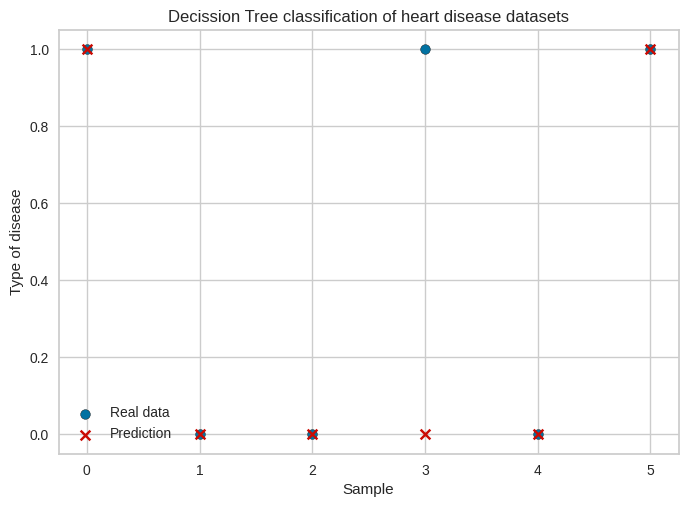

In [ ]:
plt.figure( )
plt.scatter(range(len(y_test[0:6])), y_test[0:6], c='b', marker='o',label = 'Real data',edgecolors='k')
plt.scatter(range(len(y_pred_BN[0:6])), y_pred_BN[0:6], c='r', marker='x',label = 'Prediction')
plt.legend()
plt.xlabel('Sample')
plt.title('Decission Tree classification of heart disease datasets')
plt.ylabel('Type of disease')

In [ ]:
from tensorflow.keras.callbacks import History

model_1.summary()


model_1.compile(optimizer='adam',  loss='mse', metrics=['accuracy'])

history = History()

history = model_1.fit(x_train, y_train, validation_split=0.2, epochs=500, verbose=0,callbacks=[history])

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()